# Python for Data Analysis and Machine Learning

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
import pandas as pd   #analyse
import numpy as np    #tableaux
import seaborn as sns   #visualiser les donnees
import matplotlib.pyplot as plt  #visualiser les données

import sklearn #machine learning: pca, kmeans; recommandation, anomalie etc

In [3]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [4]:
fichier="diamonds.csv"

df = pd.read_csv(fichier, index_col=0)
#df=df.sample(frac=0.01)

In [5]:
df.sample(5)

carat        cut color clarity  depth  table  price     x     y     z
28318   0.30  Very Good     H     SI1   62.5   57.0    432  4.25  4.29  2.67
22470   1.52  Very Good     H     VS1   59.8   57.0  10497  7.47  7.55  4.49
36419   0.42    Premium     D     SI1   63.0   59.0    942  4.79  4.77  3.01
35477   0.42      Ideal     E     VS2   60.9   57.0    902  4.85  4.87  2.96
29984   0.43      Ideal     I     VS2   61.9   54.0    716  4.87  4.88  3.02

In [6]:
df_num=df.select_dtypes(exclude='object')
df_num

carat  depth  table  price     x     y     z
1       0.23   61.5   55.0    326  3.95  3.98  2.43
2       0.21   59.8   61.0    326  3.89  3.84  2.31
3       0.23   56.9   65.0    327  4.05  4.07  2.31
4       0.29   62.4   58.0    334  4.20  4.23  2.63
5       0.31   63.3   58.0    335  4.34  4.35  2.75
...      ...    ...    ...    ...   ...   ...   ...
53936   0.72   60.8   57.0   2757  5.75  5.76  3.50
53937   0.72   63.1   55.0   2757  5.69  5.75  3.61
53938   0.70   62.8   60.0   2757  5.66  5.68  3.56
53939   0.86   61.0   58.0   2757  6.15  6.12  3.74
53940   0.75   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 7 columns]

In [7]:
colnum=df.select_dtypes(exclude='object').columns.tolist()
colnum

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [8]:
colobj=df.select_dtypes(include='object').columns.tolist()
colobj

['cut', 'color', 'clarity']

## PCA

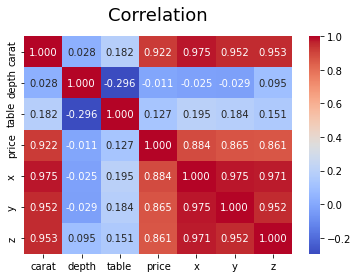

In [9]:
X=df_num.dropna()

import seaborn as sns
heatmap=sns.heatmap(X.corr(),annot=True, fmt=".3f", cmap='coolwarm')
heatmap.set_title('Correlation', fontdict={'fontsize':18}, pad=16);

In [10]:
#inconveniants: les feautures OU variables explicatives sont trop corrolés

In [11]:
#inetrets du PCA
#Le pca permet de reduire les variables( reduction de dimensions)
#le pca permet d'avoir de bonnes precisions et de reduire les temps de calcul 

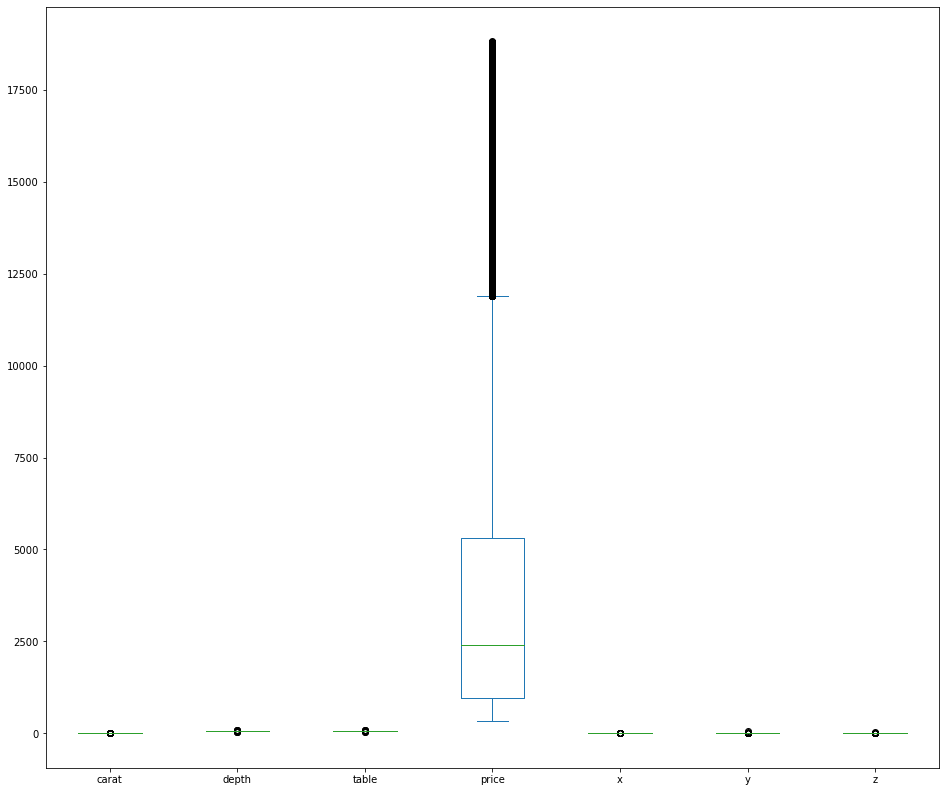

In [12]:
X.plot(kind='box', subplots=False, layout=(3,3), sharex=False, sharey=False, figsize=(16,14))
plt.show()

In [13]:
df.sample(5)

carat      cut color clarity  depth  table  price     x     y     z
28149   0.30    Ideal     G    VVS2   62.1   55.0    665  4.32  4.35  2.69
41157   0.48     Good     G     VS1   58.6   62.0   1199  5.14  5.20  3.03
19380   0.40     Good     D     SI2   63.9   53.0    622  4.68  4.71  3.00
44091   0.57    Ideal     H     VS1   61.7   54.0   1554  5.33  5.36  3.30
55      0.22  Premium     D     VS2   59.3   62.0    404  3.91  3.88  2.31

In [14]:
from sklearn.preprocessing import StandardScaler   
#X_sc=(X-moy)/ecart_type
#si beaucoup de outliers, utiliser robustscaler
#le plus simple à interpreter: minmax scaler
X_sc = StandardScaler().fit_transform(X)
X_sc=pd.DataFrame(X_sc, columns=df_num.columns)
X_sc.sample(5)

carat     depth     table     price         x         y         z
41762 -0.881717  0.105120 -1.681465 -0.673735 -0.954898 -0.932058 -0.919287
24939  1.649892 -0.243894 -0.652139  2.372335  1.567945  1.563293  1.518036
25099  2.029634  0.314528  1.137995  2.429737  1.772982  1.703382  1.773105
16219  1.080280  0.314528 -0.204605  0.639494  1.095469  1.108000  1.135433
43427 -0.565266 -1.849358  0.690462 -0.631122 -0.411105 -0.354187 -0.579195

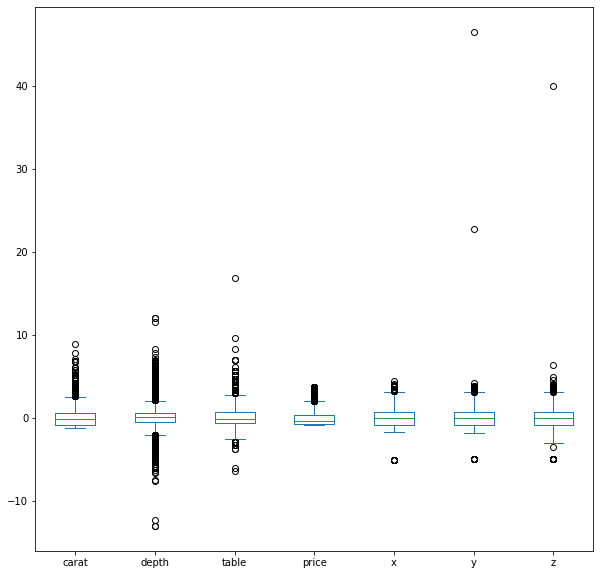

In [15]:
X_sc.plot(kind='box', subplots=False, layout=(7,1), sharex=False, sharey=False, figsize=(10,10))
plt.show()

In [16]:
X_sc.describe()

carat         depth         table         price             x  \
count  5.394000e+04  5.394000e+04  5.394000e+04  5.394000e+04  5.394000e+04   
mean   2.889982e-14 -3.658830e-15  1.274832e-14 -6.238778e-15  1.034809e-14   
std    1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00   
min   -1.261458e+00 -1.308760e+01 -6.470073e+00 -9.040952e-01 -5.109120e+00   
25%   -8.395232e-01 -5.231053e-01 -6.521385e-01 -7.476808e-01 -9.103248e-01   
50%   -2.066210e-01  3.531678e-02 -2.046051e-01 -3.839672e-01 -2.777553e-02   
75%    5.106683e-01  5.239361e-01  6.904618e-01  3.487866e-01  7.210542e-01   
max    8.886075e+00  1.204139e+01  1.680167e+01  3.732438e+00  4.465203e+00   

                  y             z  
count  5.394000e+04  5.394000e+04  
mean  -3.139766e-15 -7.314273e-15  
std    1.000009e+00  1.000009e+00  
min   -5.020931e+00 -5.014556e+00  
25%   -8.882800e-01 -8.909461e-01  
50%   -2.147398e-02 -1.237618e-02  
75%    7.052421e-01  7.103184e-01  
max    4.654965e+01  4.004758e+01

In [17]:
X_sc.shape

(53940, 7)

In [18]:
##### Principal Component Analysis #####
# -- Principal components determination
from sklearn.decomposition import PCA
pca = PCA().fit(X_sc)  #fit=s adapter ou s entrainer

In [19]:
pca.components_

array([[ 0.45244549, -0.00091613,  0.09951609,  0.42551927,  0.45321251,
         0.4472649 ,  0.44595366],
       [-0.03469601, -0.73067971,  0.67506738, -0.03525794,  0.00351255,
         0.00215791, -0.08903518],
       [-0.00549481,  0.67282929,  0.72806947, -0.10544948, -0.03950882,
        -0.05418879,  0.03960344],
       [-0.06835945, -0.047248  , -0.0595406 , -0.84977817,  0.24299509,
         0.32846061,  0.31700727],
       [-0.13399948,  0.08873829,  0.01037614,  0.05377206, -0.08898016,
         0.77405793, -0.60339656],
       [-0.76815114, -0.01445027,  0.02526831,  0.27330947, -0.19846061,
         0.21526655,  0.4986704 ],
       [ 0.42588029, -0.05560026, -0.00204926, -0.08281429, -0.82865822,
         0.20885709,  0.27995794]])

In [20]:

# -- Principal components coefficients (depending on original features)
pca_components = pd.DataFrame(pca.components_,
                      index=['PC'+str(i+1) for i in range(X.shape[1])],
                      columns=X.columns).T
pca_components

PC1       PC2       PC3       PC4       PC5       PC6       PC7
carat  0.452445 -0.034696 -0.005495 -0.068359 -0.133999 -0.768151  0.425880
depth -0.000916 -0.730680  0.672829 -0.047248  0.088738 -0.014450 -0.055600
table  0.099516  0.675067  0.728069 -0.059541  0.010376  0.025268 -0.002049
price  0.425519 -0.035258 -0.105449 -0.849778  0.053772  0.273309 -0.082814
x      0.453213  0.003513 -0.039509  0.242995 -0.088980 -0.198461 -0.828658
y      0.447265  0.002158 -0.054189  0.328461  0.774058  0.215267  0.208857
z      0.445954 -0.089035  0.039603  0.317007 -0.603397  0.498670  0.279958

In [21]:
#PCA4=-0.068359 CARAT-0.047248 DEPTH-0.059541 TABLE-0.849778 PRICE+0.242995 X+0.328461 Y+0.317007 Z

In [22]:
X.head()

carat  depth  table  price     x     y     z
1   0.23   61.5   55.0    326  3.95  3.98  2.43
2   0.21   59.8   61.0    326  3.89  3.84  2.31
3   0.23   56.9   65.0    327  4.05  4.07  2.31
4   0.29   62.4   58.0    334  4.20  4.23  2.63
5   0.31   63.3   58.0    335  4.34  4.35  2.75

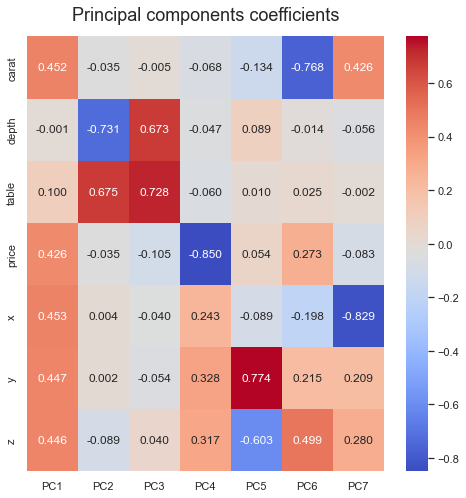

In [23]:
# Plotting principal components coefficient
import seaborn as sns
sns.set(rc={"figure.figsize":(8, 8)}) #width=3, #height=4

heatmap=sns.heatmap(pca_components,annot=True, fmt=".3f", cmap='coolwarm')
heatmap.set_title('Principal components coefficients', fontdict={'fontsize':18}, pad=16);

Une fois le nombre de composantes principales optimal déterminé, il suffit d'appliquer à nouveau la fonction de l'ACP. Elle donne un tableau avec les coefficients de chaque composante principale.

Par exemple, la composante F1 est calculée comme suit : PCA1 = 0.4CARAT-0.001DEPTH ETC etc .... Grâce à la heatmap il est possible de voir à quels axes principaux d'inertie les variables initiales sont fortement corrélées. Par exemple, les variables "DEPTH" et "TABLE" sont fortement corrélées à l'axe principale d'inertie F2. L'axe F4 pourrait représenter les prix. Le prix est fortement anti-correlée à l'axe principale d'inertie F4

In [24]:
# Projecting X on principal components
X_pca = pca.transform(X_sc)
pca.explained_variance_ratio_*100   #degres d importance de chaque pca

array([68.05592578, 18.36954396,  9.86873233,  2.48219047,  0.57581741,
        0.47066558,  0.17712446])

In [25]:
X_pca

array([[-3.14345606, -0.41070594, -0.73209535, ..., -0.0147245 ,
        -0.15103894,  0.13160809],
       [-3.04913753,  2.28519593,  0.42675952, ..., -0.07402817,
        -0.13419876,  0.14523   ],
       [-2.69522555,  4.97222008,  0.35130023, ..., -0.09753755,
        -0.07701324,  0.19592512],
       ...,
       [-0.14298433,  0.24693517,  1.36045644, ...,  0.03922924,
         0.11366133, -0.05566329],
       [ 0.40584259,  0.52871107, -0.16647801, ..., -0.0213566 ,
        -0.02665225, -0.05031733],
       [-0.12391452, -0.97048213, -0.56160503, ...,  0.01159259,
         0.04440959, -0.04196832]])

In [26]:
(pca.explained_variance_ratio_*100).cumsum()   #degres d importance des variables cumulées

array([ 68.05592578,  86.42546975,  96.29420208,  98.77639255,
        99.35220996,  99.82287554, 100.        ])

La fonction de l'ACP donne également le tableau de valeur selon les nouvelles "variables" que sont les composantes principales.

In [27]:
X_pca

array([[-3.14345606, -0.41070594, -0.73209535, ..., -0.0147245 ,
        -0.15103894,  0.13160809],
       [-3.04913753,  2.28519593,  0.42675952, ..., -0.07402817,
        -0.13419876,  0.14523   ],
       [-2.69522555,  4.97222008,  0.35130023, ..., -0.09753755,
        -0.07701324,  0.19592512],
       ...,
       [-0.14298433,  0.24693517,  1.36045644, ...,  0.03922924,
         0.11366133, -0.05566329],
       [ 0.40584259,  0.52871107, -0.16647801, ..., -0.0213566 ,
        -0.02665225, -0.05031733],
       [-0.12391452, -0.97048213, -0.56160503, ...,  0.01159259,
         0.04440959, -0.04196832]])

In [28]:
X_projected=pd.DataFrame(X_pca,columns=['PC'+str(i+1) for i in range(X.shape[1])])
X_projected

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0     -3.143456 -0.410706 -0.732095 -0.464589 -0.014725 -0.151039  0.131608
1     -3.049138  2.285196  0.426760 -0.672681 -0.074028 -0.134199  0.145230
2     -2.695226  4.972220  0.351300 -0.585917 -0.097538 -0.077013  0.195925
3     -2.627002  0.008168  0.657749 -0.368672  0.016695 -0.078659  0.088049
4     -2.428992 -0.466811  1.076289 -0.282709  0.034420 -0.037434  0.037197
...         ...       ...       ...       ...       ...       ...       ...
53935 -0.226451  0.367198 -0.566921  0.299198 -0.005857  0.024256 -0.032980
53936 -0.275640 -1.424197 -0.129628  0.310176  0.031249  0.064900 -0.034277
53937 -0.142984  0.246935  1.360456  0.140632  0.039229  0.113661 -0.055663
53938  0.405843  0.528711 -0.166478  0.543757 -0.021357 -0.026652 -0.050317
53939 -0.123915 -0.970482 -0.561605  0.413846  0.011593  0.044410 -0.041968

[53940 rows x 7 columns]

In [29]:
X.head(2)

carat  depth  table  price     x     y     z
1   0.23   61.5   55.0    326  3.95  3.98  2.43
2   0.21   59.8   61.0    326  3.89  3.84  2.31

In [30]:
X_sc.sample(2)

carat     depth     table     price         x         y         z
13552  0.489572  0.872950  0.690462  0.405625  0.587335  0.617686  0.710318
26978  2.852407  0.035317 -0.204605  3.291270  2.236543  2.246231  2.226560

In [31]:
X_projected.sample(3)

PC1       PC2       PC3       PC4       PC5       PC6       PC7
1482   0.241529 -0.586653 -0.346417  0.469883  0.002909 -0.001450 -0.026784
6256   0.775013  0.446088  0.451712  0.312816  0.040363  0.059901 -0.005585
19956  2.233282 -0.779547 -0.490378 -0.092456  0.024106  0.120649 -0.042243

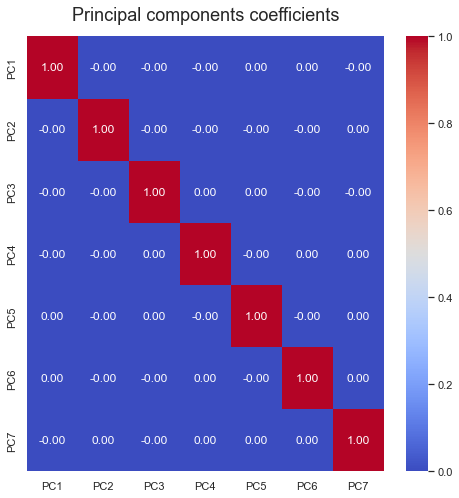

In [32]:
# Plotting correlation coefficient X_projected
import seaborn as sns
heatmap=sns.heatmap(X_projected.corr(),annot=True, fmt=".2f", cmap='coolwarm')
heatmap.set_title('Principal components coefficients', fontdict={'fontsize':18}, pad=16);

In [33]:
#BONNES NOUVELLES: les pca sont au meme echelle et ne sont pas corréles

In [34]:
pca.singular_values_  #valeurs propres


array([506.91770986, 263.36234374, 193.03460713,  96.81040635,
        46.62801047,  42.15612757,  25.86090776])

In [35]:
pca.explained_variance_ratio_*100   #degres d importance de chaque pca

array([68.05592578, 18.36954396,  9.86873233,  2.48219047,  0.57581741,
        0.47066558,  0.17712446])

In [36]:
100/7

14.285714285714286

In [37]:
X.shape[1]

7

In [38]:
pkaiser=100/X.shape[1]
pkaiser

14.285714285714286

In [39]:
#d apres le critere de Kaiser, on peut prendre tous les PCA qui ont une inertie de 14%. 
#Ce choix garantie une tres bonne precision

<AxesSubplot:xlabel='variables'>

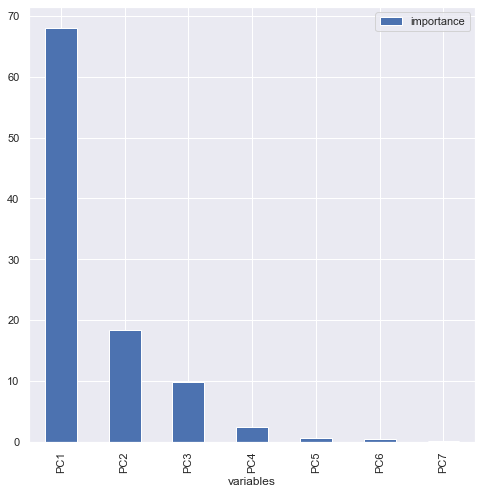

In [40]:
infopca=pd.DataFrame()
infopca["variables"]=['PC'+str(i+1) for i in range(X.shape[1])]
infopca["importance"]=pca.explained_variance_ratio_*100
infopca.set_index("variables", inplace=True)
infopca.plot(kind="bar")

In [41]:
pca.explained_variance_ratio_*100

array([68.05592578, 18.36954396,  9.86873233,  2.48219047,  0.57581741,
        0.47066558,  0.17712446])

In [42]:
(pca.explained_variance_ratio_*100).cumsum()

array([ 68.05592578,  86.42546975,  96.29420208,  98.77639255,
        99.35220996,  99.82287554, 100.        ])

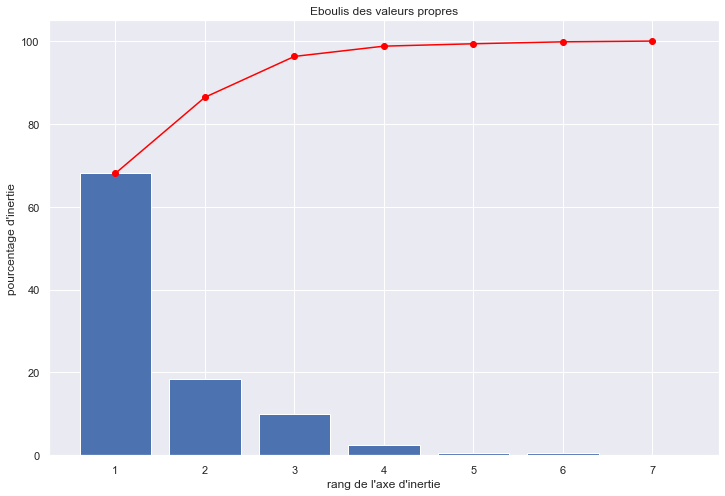

In [43]:
#Variances expliquées
important_degres = pca.explained_variance_ratio_*100

#Projection de l'éboulis des valeurs propres
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(important_degres))+1, important_degres)
plt.plot(np.arange(len(important_degres))+1, important_degres.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

#on peut prendre que les 3 premieres composantes principales car elles expliquent le datset à plus de 95% (68+18+9=96)
#Vous pouvez sussi utiliser le crutere de Kaiser en prennant que les variables pca dont le degres d importance est sipperieur à 100/7  (les calculs seront 2.5 fois plus rapide)

In [44]:
#Creating a 3D scatterplot of the new components: 

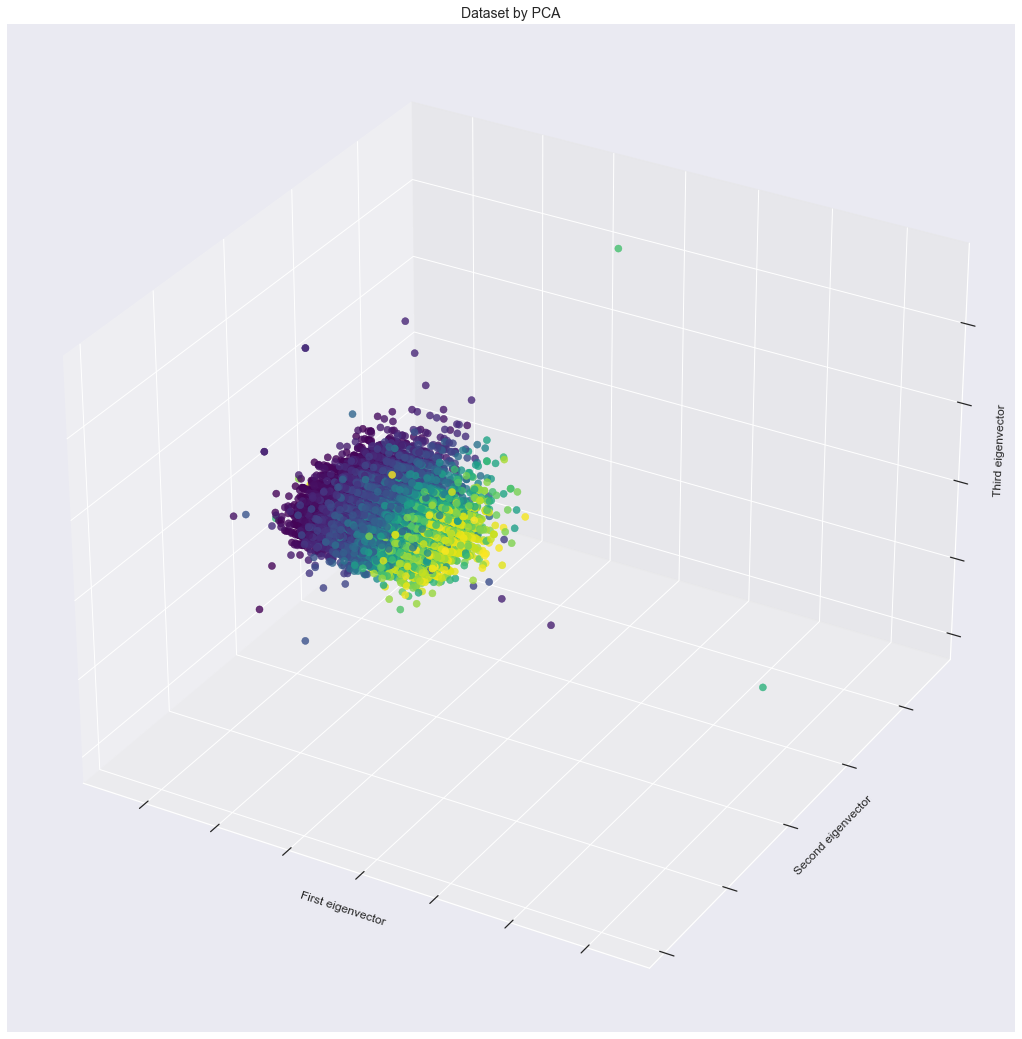

In [45]:
from mpl_toolkits.mplot3d import Axes3D
##### Principal Component Analysis #####

x_reduced = X_pca
fig = plt.figure(figsize=(14, 14))
axes = Axes3D(fig)
axes.set_title("Dataset by PCA", size=14)
axes.set_xlabel("First eigenvector")
axes.set_ylabel("Second eigenvector")
axes.set_zlabel("Third eigenvector")
axes.w_xaxis.set_ticklabels(())
axes.w_yaxis.set_ticklabels(())
axes.w_zaxis.set_ticklabels(())
axes.scatter(x_reduced[:,0],x_reduced[:,1],x_reduced[:,2],
             c=df.price,cmap='viridis', linewidth=0.5, s = 50, alpha = 0.8)

In [46]:
X.isna().sum()

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

In [47]:
X.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [48]:
#pip install mlxtend

Dim 1     Dim 2
carat -0.990220 -0.028594
depth -0.035821 -0.845264
table -0.193569  0.805343
price -0.942099 -0.028372
x     -0.992365  0.010214
y     -0.992080  0.006422
z     -0.989421 -0.088004

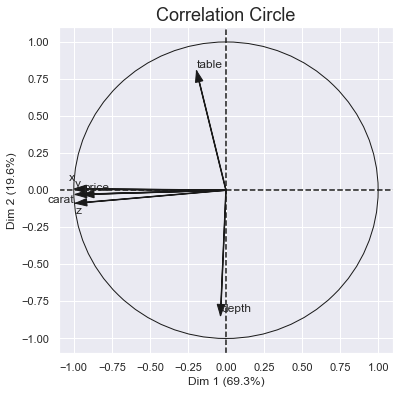

In [49]:
#pip install mlxtend
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn.preprocessing import StandardScaler

# Using the pca above computed (PC1, PC2)
X=df_num.dropna().sample(1000)

fig, correlation_matrix = plot_pca_correlation_graph(
    StandardScaler().fit_transform(X), 
    X.columns,
    dimensions=(1, 2),
    figure_axis_size=6)
correlation_matrix

## CLUSTERING or SEGMENTATION


In [50]:
#au lieu de faire de la segmentation qui est une methode de ML un peu compliqué, il ya le scoring qui est une methode statistique
#explication des modlees de scoring: https://www.agiretentreprendre.fr/scoring-rfm/
#un exemple prztique avec python: https://www.datacamp.com/tutorial/introduction-customer-segmentation-python

#pour faire du clustering, conseils:
  1. Faites d abord une analyse en composante principale et ainsi retenir que les pca tres interessantes
     Cela permet d'avoir moins de données à traiter et aussi augmenter les performances de calcul et precision
        (gain en temps de calcul + Gain en precision)
  2.Selectionner le nombre de cluster OPTIMAL avec les methodes silouette et elbow

In [51]:
X.sample(5)

carat  depth  table  price     x     y     z
53925   0.73   61.6   55.0   2756  5.82  5.84  3.59
39397   0.41   61.3   56.0   1076  4.79  4.77  2.93
12957   1.00   61.5   57.0   5387  6.44  6.37  3.94
2242    1.06   62.8   55.0   3146  6.51  6.46  4.07
40861   0.33   61.2   55.0   1174  4.48  4.51  2.75

## Traitement des donnees

In [52]:
X_sc = StandardScaler().fit_transform(X)
pca = PCA(n_components=3).fit(X_sc)   #ON pouvait prendre 2 avec le critere de Kaiser ou 3 variables pour avoir une 95% 
# Projecting X on principal components
X_pca = pca.transform(X_sc)
pd.DataFrame(X_pca)

0         1         2
0   -1.967535  1.618544  0.959528
1    1.367197 -0.861734 -0.885492
2   -0.461191 -0.933738  0.698596
3   -2.509560 -0.356203 -0.895432
4    2.206077  0.730595  0.685329
..        ...       ...       ...
995  6.233078  1.644029 -0.729862
996  0.608991 -0.190667 -0.792586
997 -2.539731 -0.883687 -0.392443
998  1.482474 -0.449414  0.613603
999 -0.981301 -0.957173 -0.483919

[1000 rows x 3 columns]

## Nombre de cluster optimal

In [53]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

### KElbowVisualizer

In [54]:
pd.DataFrame(X_pca).corr().round(3)

0    1    2
0  1.0  0.0  0.0
1  0.0  1.0  0.0
2  0.0  0.0  1.0

In [55]:
df_num

carat  depth  table  price     x     y     z
1       0.23   61.5   55.0    326  3.95  3.98  2.43
2       0.21   59.8   61.0    326  3.89  3.84  2.31
3       0.23   56.9   65.0    327  4.05  4.07  2.31
4       0.29   62.4   58.0    334  4.20  4.23  2.63
5       0.31   63.3   58.0    335  4.34  4.35  2.75
...      ...    ...    ...    ...   ...   ...   ...
53936   0.72   60.8   57.0   2757  5.75  5.76  3.50
53937   0.72   63.1   55.0   2757  5.69  5.75  3.61
53938   0.70   62.8   60.0   2757  5.66  5.68  3.56
53939   0.86   61.0   58.0   2757  6.15  6.12  3.74
53940   0.75   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 7 columns]

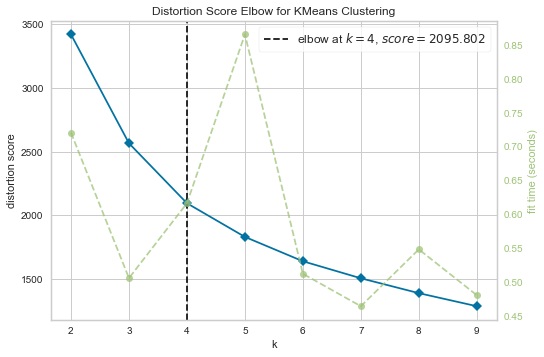

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
from sklearn.cluster import KMeans   #modele 
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()  #on definie une instance

visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


In [57]:
#D apres la methode elbow, on a une valeur optimale de 4 (modele), 
#cependant on pourrait essayer 3 (experience, subjective)

### SilhouetteVisualizer

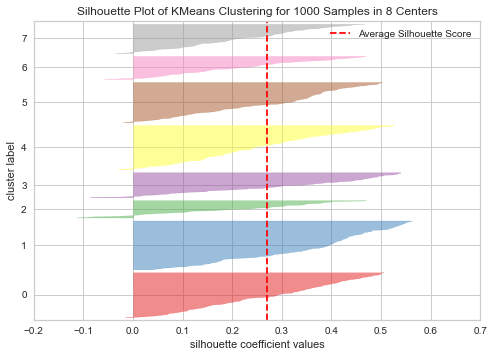

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1000 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [58]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = SilhouetteVisualizer(model, k=(2,10))

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

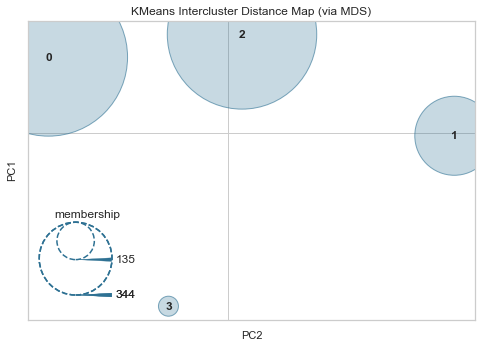

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [59]:
from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
model = KMeans(4)
visualizer = InterclusterDistance(model)

visualizer.fit(X_pca)        # vous avez le choix d'utiliser X_brut, X_standardisé, X_pca
visualizer.show()        # Finalize and render the figure

#choix1 statistques avec elbow: opt=3 et avoir une vision d'ensembe
#Choix2 avec silouette: opt=8 et rentrer dans les details
#choix3 (un peu personnel): opt=4

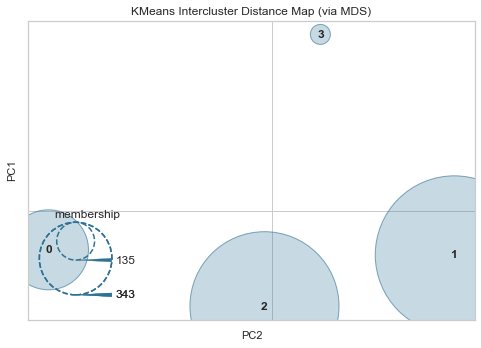

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [60]:
from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
model = KMeans(4)
visualizer = InterclusterDistance(model)

visualizer.fit(X_pca)        # vous avez le choix d'utiliser X_brut, X_standardisé, X_pca
visualizer.show()        # Finalize and render the figure

#choix1 statistques avec elbow: opt=3 et avoir une vision d'ensembe
#Choix2 avec silouette: opt=8 et rentrer dans les details
#choix3 (un peu personnel): opt=4

In [61]:
#decision: on prendra 4 cluster pour notre modele

## Clustering avec kmeans

In [62]:
X.head(2)

carat  depth  table  price     x     y     z
13036   0.38   61.0   61.0    600  4.61  4.67  2.83
17847   1.07   61.8   55.0   7198  6.59  6.55  4.06

In [64]:
## KMeans Clustering with 4
from sklearn.cluster import KMeans
n_clusters=4
X['cluster'] = KMeans(n_clusters).fit(X).labels_    
#on chosit x_pc pour entrainer le modele, et puis on stocke les labels obtenus dans notre base de donnees de depart
X.head()

carat  depth  table  price     x     y     z  cluster
13036   0.38   61.0   61.0    600  4.61  4.67  2.83        0
17847   1.07   61.8   55.0   7198  6.59  6.55  4.06        2
49259   0.70   63.3   57.0   2088  5.58  5.63  3.55        0
4402    0.31   61.2   55.0    571  4.37  4.49  2.71        0
16933   1.28   61.7   60.0   6762  7.05  6.95  4.32        2

## Analyse des resultats

In [65]:
X.sample(10)

carat  depth  table  price     x     y     z  cluster
41808   0.40   62.4   58.0   1250  4.70  4.72  2.94        0
5902    0.92   62.4   59.0   3932  6.17  6.14  3.84        2
42262   0.49   59.2   60.9   1294  5.08  5.18  3.04        0
37817   0.36   60.4   62.0   1002  4.60  4.64  2.79        0
1422    0.78   61.6   56.0   2970  5.94  5.91  3.64        0
988     0.79   61.5   56.0   2896  5.91  5.96  3.65        0
21061   1.26   61.4   57.0   9236  7.02  6.96  4.29        3
48920   0.70   63.3   55.0   2042  5.63  5.68  3.58        0
7157    0.85   60.7   57.0   4181  6.11  6.14  3.72        2
18811   1.06   58.5   57.0   7699  6.68  6.73  3.92        3

In [66]:
X.cluster.value_counts(normalize=True)*100

0    55.0
2    27.9
3    10.7
1     6.4
Name: cluster, dtype: float64

<AxesSubplot:>

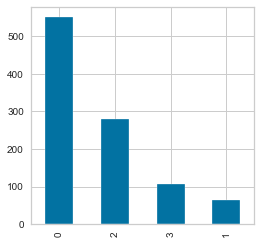

In [67]:
X.cluster.value_counts().plot(kind='bar', figsize=(4,4))

<AxesSubplot:ylabel='cluster'>

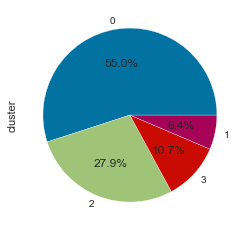

In [68]:
X.cluster.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(4,4))

In [69]:
X.head()

carat  depth  table  price     x     y     z  cluster
13036   0.38   61.0   61.0    600  4.61  4.67  2.83        0
17847   1.07   61.8   55.0   7198  6.59  6.55  4.06        2
49259   0.70   63.3   57.0   2088  5.58  5.63  3.55        0
4402    0.31   61.2   55.0    571  4.37  4.49  2.71        0
16933   1.28   61.7   60.0   6762  7.05  6.95  4.32        2

In [70]:
X["volume"]=X["x"]*X["y"]*X["z"]
X=X.drop(columns=["x","y","z"])
X.head(5)

carat  depth  table  price  cluster      volume
13036   0.38   61.0   61.0    600        0   60.926221
17847   1.07   61.8   55.0   7198        2  175.247870
49259   0.70   63.3   57.0   2088        0  111.524670
4402    0.31   61.2   55.0    571        0   53.173723
16933   1.28   61.7   60.0   6762        2  211.669200

In [71]:
X.groupby("cluster").mean()/X.mean()

carat  cluster     depth     price     table    volume
cluster                                                           
0        0.562052      NaN  0.998874  0.313293  0.994672  0.565866
1        2.408782      NaN  1.002112  3.716279  1.010465  2.402610
2        1.258234      NaN  1.002933  1.213832  1.006260  1.252924
3        1.735161      NaN  0.996876  2.347550  1.004805  1.733090

In [72]:
#cluster3:   haute gamme
#cluster2 :  bad gamme
#cluster 0 : gamme moyen+
#cluster 1 : gamme moyen-

In [73]:
haute_gamme=X.query('cluster==3')
haute_gamme.to_csv("haute_gamme_dataset.csv")

In [74]:
X.drop(columns=["table","depth"], inplace=True)  #pas trop de differences entre les clusters
X.sample(5)

carat  price  cluster      volume
38624   0.31    489        0   50.154390
35300   0.30    473        0   48.681576
43939   0.30    515        0   50.058064
13272   1.00   5484        2  155.215224
19256   1.24   7986        3  198.949704

In [75]:
X.groupby("cluster").mean()

carat         price      volume
cluster                                    
0        0.461236   1298.647273   75.644912
1        1.976719  15404.546875  321.180544
2        1.032545   5031.519713  167.490696
3        1.423925   9730.953271  231.679138

In [76]:
X.groupby("cluster").mean()/X.mean().drop("cluster")

carat     price    volume
cluster                              
0        0.562052  0.313293  0.565866
1        2.408782  3.716279  2.402610
2        1.258234  1.213832  1.252924
3        1.735161  2.347550  1.733090

In [77]:
#cluster3 : on est 3 fois plus cher par rapport à la moyenne, 2 fois plus de qualite et 2 fois plus volumineux

In [78]:
#fin pour le cours sur le clustering

In [79]:
dfknn = X.groupby("cluster").mean()/X.mean().drop("cluster")
dfknn

carat     price    volume
cluster                              
0        0.562052  0.313293  0.565866
1        2.408782  3.716279  2.402610
2        1.258234  1.213832  1.252924
3        1.735161  2.347550  1.733090

In [80]:
# pip install plotly
import plotly.graph_objects as go
dfknn = X.groupby("cluster").mean()/X.mean().drop("cluster")
categories = dfknn.columns.tolist()

fig = go.Figure()
for i in range(4):
    fig.add_trace(go.Scatterpolar(
          r=dfknn[i:i+1].values.tolist()[0],
          theta=categories,
          fill='toself',
          name='cluster'+' n° '+str(i)))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=True
)

fig.show()

In [81]:
bad_game=X.query('cluster==1')
bad_game.sample(5)

carat  price  cluster      volume
25566   2.01  14402        1  320.817024
27502   2.01  18206        1  320.066164
24827   1.73  13221        1  281.078952
26070   2.03  15291        1  327.084472
27525   2.03  18257        1  325.022848

In [82]:
X.query('cluster==0').sample(5)

carat  price  cluster     volume
39570   0.44   1081        0  73.586240
30273   0.31    446        0  50.297280
33656   0.41    834        0  67.092912
13036   0.38    600        0  60.926221
10727   0.31    593        0  50.964100

In [83]:
X.groupby("cluster").mean()

carat         price      volume
cluster                                    
0        0.461236   1298.647273   75.644912
1        1.976719  15404.546875  321.180544
2        1.032545   5031.519713  167.490696
3        1.423925   9730.953271  231.679138

In [84]:
#y a pas une difference significative au niveau des variables table et depth (test anova)
#les differences se situent au niveau des variables prix, volume et carat

In [85]:
#completer les infos
#cluster 0: diamonds de gamme moyenne (en terme de prix, volume et carat)
#cluster 1: diamonds tres volumineux et cheres avec des carats tres importants
#cluster 2: les diamonds tres abordables et moins volumineux

<AxesSubplot:ylabel='cluster'>

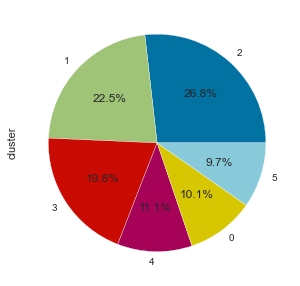

In [86]:
#regardons en details les 8 clusters
## KMeans Clustering with 6
from sklearn.cluster import KMeans
n_clusters=6
X['cluster'] = KMeans(n_clusters).fit(X_pca).labels_
fig, ax = plt.subplots(figsize=(5,5))
X.cluster.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [87]:
info=(X.groupby("cluster").mean()/X.mean())[["carat","price","volume"]].sort_values(by="price")
info["%population"]=X.cluster.value_counts(normalize=True)*100
info

carat     price    volume  %population
cluster                                           
2        0.416635  0.190092  0.420896         26.8
4        0.568449  0.303341  0.571769         11.1
3        0.796136  0.571842  0.799907         19.8
1        1.309888  1.402618  1.302294         22.5
5        1.444829  1.611098  1.448708          9.7
0        2.304315  3.270240  2.295158         10.1

In [88]:
X[X.cluster==1].describe()

carat         price  cluster      volume
count  225.000000    225.000000    225.0  225.000000
mean     1.074933   5814.066667      1.0  174.090452
std      0.143197   1801.554165      0.0   23.188504
min      0.900000   3011.000000      1.0  142.553950
25%      1.000000   4478.000000      1.0  161.437500
50%      1.030000   5522.000000      1.0  166.866986
75%      1.120000   6707.000000      1.0  185.491366
max      1.700000  14033.000000      1.0  263.904960

<AxesSubplot:title={'center':'Clustering'}, ylabel='cluster'>

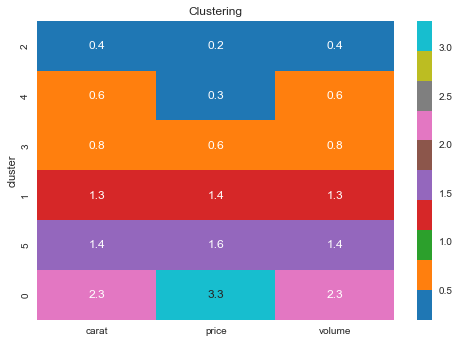

In [89]:
cmap = sns.diverging_palette(150, 5, as_cmap=True)
info=(X.groupby("cluster").mean()/X.mean())[["carat","price","volume"]].sort_values(by="price")
info
#Heatmap of 
from matplotlib import rcParams
plt.title('Clustering')
rcParams['figure.figsize'] = (10, 5)
sns.heatmap(info, annot=True,cmap=sns.color_palette("tab10"),square=False, fmt='.1f')

In [90]:
#pca et clustering references (modele non supervisé)
#sklearn: calcul
#yellowbrik: visualisation
#next: recommanation dans deux semaines

#modele supervisé: classification, regression
#next: semaine prochaine

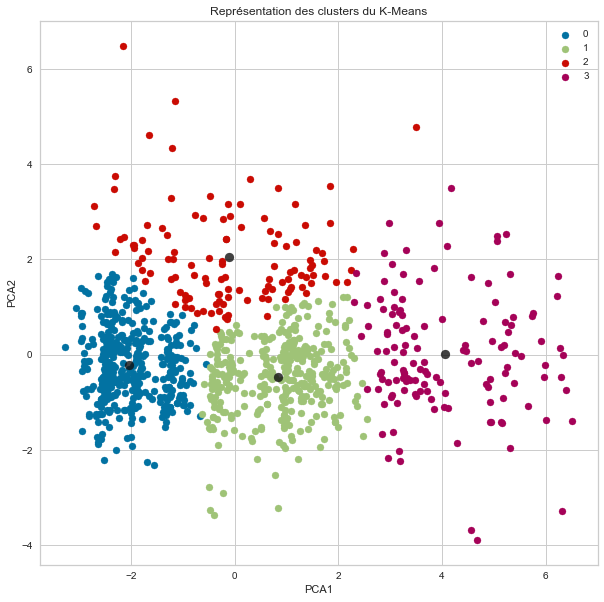

In [91]:
#https://analyticsinsights.io/le-clustering-definition-et-implementations/
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4) # on veut diviser le dataset en 4 cluster(4 type de produits)

#Prédiction
label = km.fit_predict(X_pca)
X["cluster"]=label
centroids = km.cluster_centers_
u_labels = np.unique(label)
#df['classe']=u_labels
#après on fait un group_by()

#Représentation graphique:

plt.figure(figsize=(10,10))
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, alpha = 0.8, color = 'k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig("representation_kmeans.png")
plt.show()

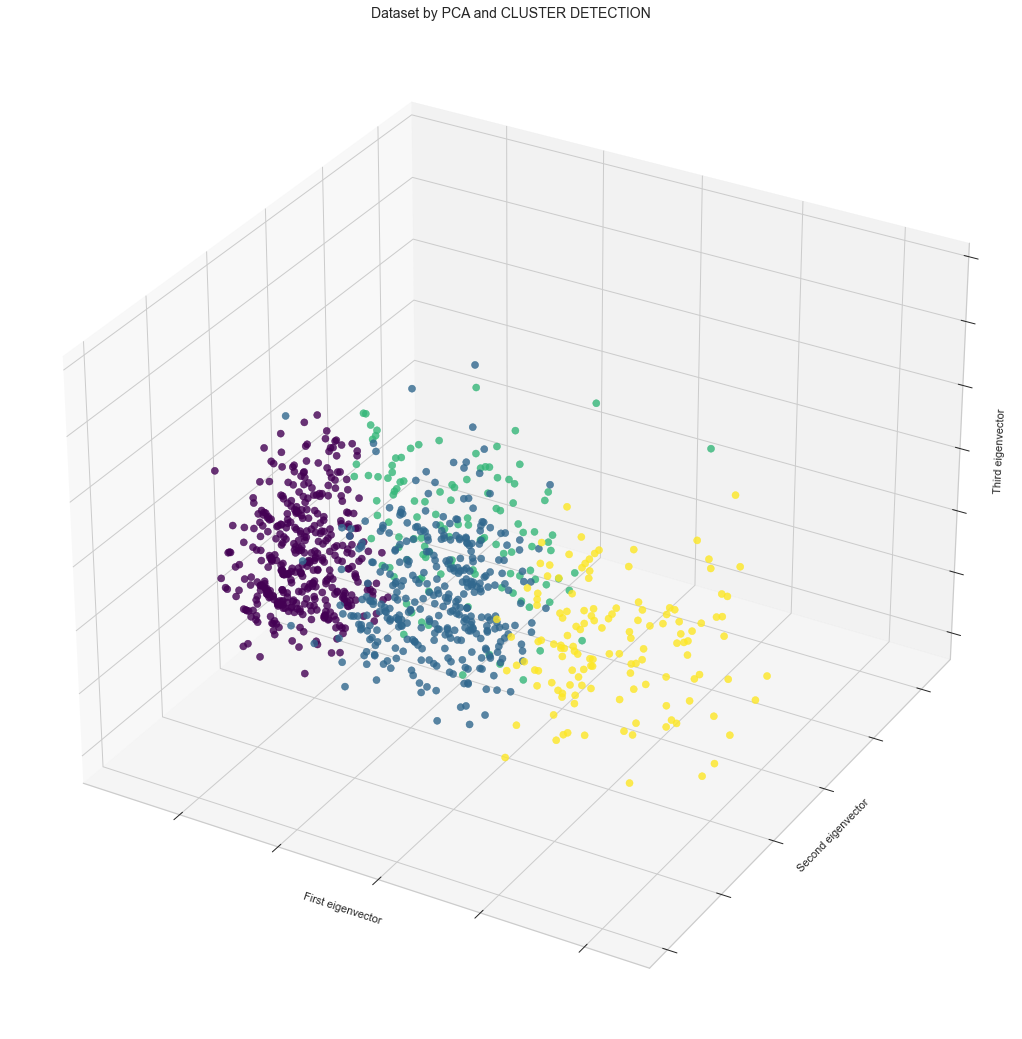

In [92]:
from mpl_toolkits.mplot3d import Axes3D
##### Principal Component Analysis #####
from sklearn.decomposition import PCA
fig = plt.figure(figsize=(14,14))
axes = Axes3D(fig)
axes.set_title("Dataset by PCA and CLUSTER DETECTION", size=14)
axes.set_xlabel("First eigenvector")
axes.set_ylabel("Second eigenvector")
axes.set_zlabel("Third eigenvector")
axes.w_xaxis.set_ticklabels(())
axes.w_yaxis.set_ticklabels(())
axes.w_zaxis.set_ticklabels(())
axes.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=X.cluster,cmap='viridis',linewidth=0.5, s = 50, alpha = 0.8)


In [93]:
X.cluster.value_counts()

0    402
1    344
3    135
2    119
Name: cluster, dtype: int64

## DETECTION ANOMALIE

In [94]:
df.head(3)

carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31

In [95]:
data=df.select_dtypes(exclude='object')
data.head()

carat  depth  table  price     x     y     z
1   0.23   61.5   55.0    326  3.95  3.98  2.43
2   0.21   59.8   61.0    326  3.89  3.84  2.31
3   0.23   56.9   65.0    327  4.05  4.07  2.31
4   0.29   62.4   58.0    334  4.20  4.23  2.63
5   0.31   63.3   58.0    335  4.34  4.35  2.75

In [96]:
#ANOMALIE UNIVARIEE

<AxesSubplot:xlabel='price'>

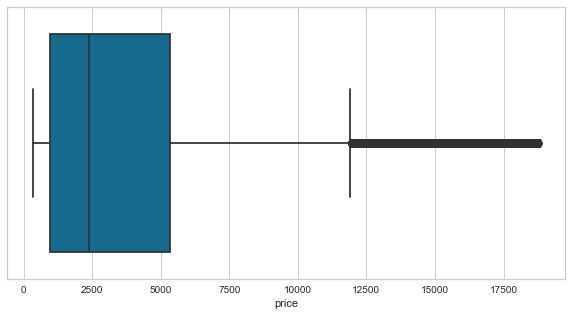

In [97]:
sns.boxplot(x="price", data=data) #les prix de plus de 12500 euros sont trop chers

<AxesSubplot:xlabel='price'>

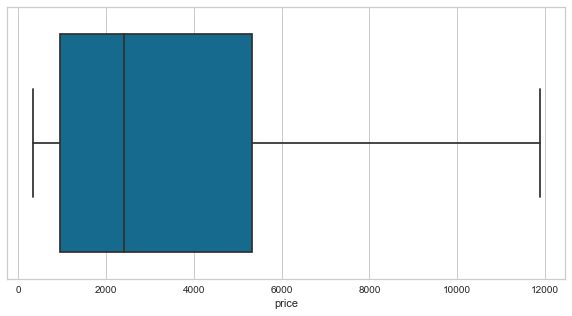

In [98]:
sns.boxplot(x="price", data=data, showfliers=False) #les prix de plus de 12000 euros sont trop chers

In [99]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
low=q1-1.5*IQR
high=q3+1.5*IQR
high       
                 

carat        2.000
depth       64.750
table       63.500
price    11885.625
x            9.285
y            9.270
z            5.735
dtype: float64

<AxesSubplot:xlabel='cut', ylabel='price'>

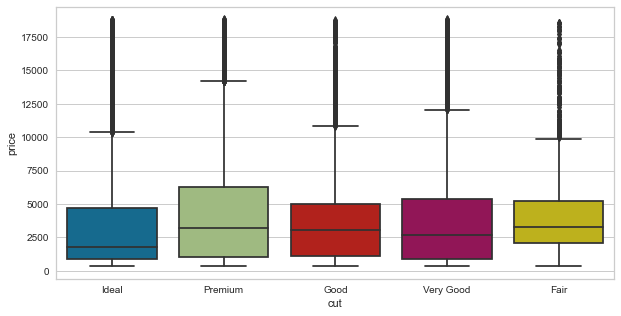

In [100]:
sns.boxplot(y="price", x="cut",data=df, showfliers=True) #les prix de plus de 12000 euros sont trop chers

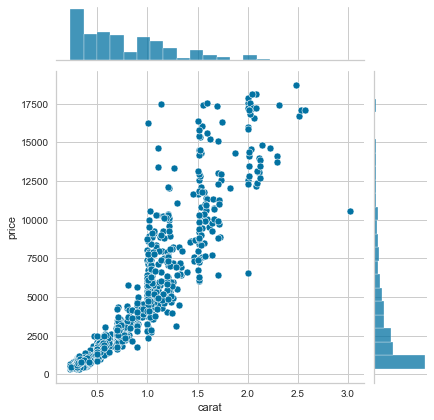

In [101]:
sns.jointplot(data=data.sample(1000), x="carat", y="price")

In [102]:
#https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html#sphx-glr-auto-examples-miscellaneous-plot-anomaly-comparison-py
#détection d'anomalies pour la détection des valeurs aberrantes sur les jeux de données
#https://towardsdatascience.com/anomaly-detection-with-isolation-forest-visualization-23cd75c281e2#specify the 12 metrics column names to be modelled
##https://blog.paperspace.com/anomaly-detection-isolation-forest/

from sklearn.ensemble import IsolationForest
clf=IsolationForest(contamination=0.02) #detecter 2% des diamants les plus atypiques
clf.fit(data)
data['anomaly']=clf.predict(data)
data

carat  depth  table  price     x     y     z  anomaly
1       0.23   61.5   55.0    326  3.95  3.98  2.43        1
2       0.21   59.8   61.0    326  3.89  3.84  2.31       -1
3       0.23   56.9   65.0    327  4.05  4.07  2.31       -1
4       0.29   62.4   58.0    334  4.20  4.23  2.63        1
5       0.31   63.3   58.0    335  4.34  4.35  2.75        1
...      ...    ...    ...    ...   ...   ...   ...      ...
53936   0.72   60.8   57.0   2757  5.75  5.76  3.50        1
53937   0.72   63.1   55.0   2757  5.69  5.75  3.61        1
53938   0.70   62.8   60.0   2757  5.66  5.68  3.56        1
53939   0.86   61.0   58.0   2757  6.15  6.12  3.74        1
53940   0.75   62.2   55.0   2757  5.83  5.87  3.64        1

[53940 rows x 8 columns]

In [103]:
data.anomaly.value_counts()

 1    52861
-1     1079
Name: anomaly, dtype: int64

<AxesSubplot:ylabel='anomaly'>

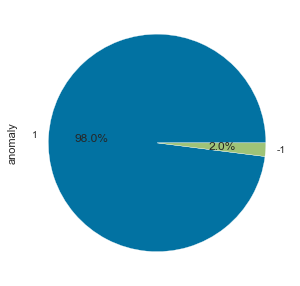

In [104]:
data.anomaly.value_counts().plot(kind='pie', autopct='%1.1f%%')

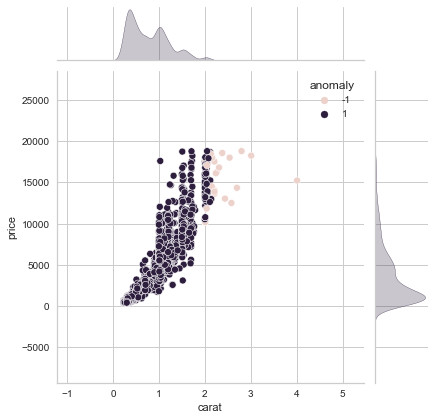

In [105]:
sns.jointplot(data=data.sample(2000), x="carat", y="price", marker="o", hue="anomaly")

In [106]:
data["volume"]=data.x*data.y*data.y


In [107]:
data.groupby("anomaly").mean()[["carat","volume","price"]]

carat      volume         price
anomaly                                    
-1       2.103021  573.402169  13886.800741
 1       0.771300  203.502447   3729.618414

In [ ]:
def detecter_anomalie(mydata, contamination):
    from sklearn.ensemble import IsolationForest
    mydata['anomaly']=IsolationForest(contamination=contamination).fit(mydata).predict(mydata)
    return mydata
detecter_anomalie(data, 0.02)

In [ ]:
outliers=data.loc[data['anomaly']==-1]
outliers.sample(5)

In [ ]:
data.groupby("anomaly").mean().T

In [ ]:
data

In [ ]:
info

In [ ]:
g = sns.JointGrid(data=data, x="carat", y="price", hue="anomaly")
g.plot(sns.scatterplot, sns.boxplot) #sns.kdeplot histplot
#g.refline(x=2.3, y=10000)


In [ ]:
X_pca=PCA(n_components=3).fit_transform(data.fillna(data.mean()))

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
##### Principal Component Analysis #####
from sklearn.decomposition import PCA
fig = plt.figure(figsize=(15,15))
axes = Axes3D(fig)
axes.set_title("Dataset by PCA and ANOMALY DETECTION", size=14)
axes.set_xlabel("First eigenvector")
axes.set_ylabel("Second eigenvector")
axes.set_zlabel("Third eigenvector")
axes.w_xaxis.set_ticklabels(())
axes.w_yaxis.set_ticklabels(())
axes.w_zaxis.set_ticklabels(())
axes.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=data.anomaly,cmap='viridis', linewidth=0.5, s = 50, alpha = 0.8)

plt.legend(("normal", "avec anomalie"))

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
##### Principal Component Analysis #####
from sklearn.decomposition import PCA
fig = plt.figure(figsize=(15,15))
axes = Axes3D(fig)
axes.set_title("Dataset by PCA and ANOMALY DETECTION", size=14)
axes.set_xlabel("First eigenvector")
axes.set_ylabel("Second eigenvector")
axes.set_zlabel("Third eigenvector")
axes.w_xaxis.set_ticklabels(())
axes.w_yaxis.set_ticklabels(())
axes.w_zaxis.set_ticklabels(())
data3=data.sample(5000)
#axes.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=data.anomaly,cmap='viridis', linewidth=0.5, s = 50, alpha = 0.8)
axes.scatter(data3.carat,data3.price,data3.volume,c=data3.anomaly,cmap='viridis', linewidth=0.5, s = 50, alpha = 0.8)

plt.legend(("normal", "avec anomalie"))


In [ ]:
outliers=data.query('anomaly==-1')
outliers.sample(10)

In [ ]:
outliers.to_csv("diamonds_avec_anomalie.csv")

In [ ]:
without_outliers=data.loc[data['anomaly']==1]
without_outliers.to_csv("diamonds_sans_anomalie.csv")

In [ ]:
import scipy.cluster.hierarchy as sch

data2=data.sample(10)
plt.figure(figsize=(8,4))
dend = sch.dendrogram(sch.linkage(data2),labels=data2.index)
plt.xlabel('numero des diamants')
plt.ylabel('')

## REGRESSION

In [ ]:
#variable à expliquer
y=df.price
#Variables explicatives
X=df.drop(columns="price")
X.head()
X_net=X.fillna(X.mean())
X_net_encoder=pd.get_dummies(X_net, columns=["cut","color","clarity"])
X_net_encoder.head()
X_net_encoder_normalise=(X_net_encoder-X_net_encoder.mean())/X_net_encoder.std()
X_pca=PCA(n_components=4).fit_transform(X_net_encoder_normalise)
X_net_encoder_normalise_pca=pd.DataFrame(X_pca, columns=["PCA1","PCA2","PCA3","PCA4"])
X_net_encoder_normalise_pca.head()

## CLASSIFICATION

In [ ]:
#done

In [ ]:
df.price.describe()

In [ ]:
labels=['abordable', 'chere']
df['type_price'] = pd.qcut(df['price'], [0, 0.5, 1], labels=labels)
df.sample(5)

In [ ]:
#variable à expliquer
y=df.type_price
#Variables explicatives
X=df.drop(columns="type_price")
X_net=X.fillna(X.mean())
X_net_encoder=pd.get_dummies(X_net, columns=["color","clarity","cut"])
X_net_encoder.head()

In [ ]:
y.sample(5)

In [ ]:
#biblioteques
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix  #score

#choisir le modele
model = KNeighborsClassifier (5)

#entrainer le modele
model.fit(X_net_encoder, y)

#voir la performance du modele
print('Train set accuracy: {:.2f}'.format(model.score(X_net_encoder, y)))
print('\n')

#Make prediction
prediction = model.predict(X_net_encoder)

#la matrice de confusion
confusion = confusion_matrix(y, prediction)

print('Confusion matrix:\n')
print(confusion)

#checking the performance of the model
y_verif= pd.DataFrame({'Expected':y, 'Predicted':prediction})
y_verif.head(11)

## SYSTEME DE RECOMMANDATION

In [ ]:
df.head()

In [ ]:
del df["type_price"]

In [ ]:
dfknn=df.select_dtypes(exclude='object').dropna()
dfknn.head(5)

dfknn["volume"]=dfknn["x"]*dfknn["y"]*dfknn["z"]
dfknn.drop(columns=["x","y","z", "table","depth"], inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
dfknn=pd.DataFrame(StandardScaler().fit_transform(dfknn), columns=dfknn.columns)
dfknn.head(5)

In [ ]:
import pandas as pd
from sklearn.neighbors import KDTree
tree = KDTree(dfknn)

In [ ]:
#ON REGARDE LE DIAMAND NUMERO 9
dfknn[9:10]

In [ ]:
dist, ind = tree.query(dfknn[9:10], k=5)


In [ ]:
dist

In [ ]:
ind.tolist()


In [ ]:
dfknn.iloc[ind.tolist()[0]]


In [ ]:
dfknn.iloc[ind.tolist()[0]].sort_values("price",ascending=True) #le moins cher

In [ ]:
import plotly.graph_objects as go

categories = dfknn.columns.tolist()

fig = go.Figure()
for i in ind.tolist()[0][0:5]:   #essayez [2456,23,89,2000,5500]
    fig.add_trace(go.Scatterpolar(
          r=dfknn[i:i+1].values.tolist()[0],
          theta=categories,
          fill='toself',
          name='Product'+' n° '+str(i)))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=True
)

fig.show()

## BRIEF INTRODUCTION TO NATURAL LANGUAGE PROCESSING

In [ ]:

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
 
docs=["la vie est belle",
"le cours de quatrième annee" ,
"le cours est validé",
"le passage en cinquième annee"
]
docs

In [ ]:

#instantiate CountVectorizer()
countvectorizer=CountVectorizer()
 
# this steps generates word counts for the words in your docs
word_count_vector=countvectorizer.fit_transform(docs)
word_count_vector.shape


In [ ]:
print(countvectorizer.get_feature_names())

In [ ]:
pd.DataFrame(countvectorizer.fit_transform(docs).toarray(), columns=countvectorizer.get_feature_names())

## PREPROCESSING

In [ ]:
xx = pd.DataFrame(
...     {'city': ['London', 'London', 'Paris', 'Sallisaw'],
         'douleur': ["sansdouleur", "tresmal","mal","tresmal"],
...      'texte': ["His Last Bow", "How Watson Learned the Trick",
...                "A Moveable Feast", "The Grapes of Wrath"],
...      'expert_rating': [4, 3, 4, 5],
...      'user_rating': [4, 5, 4, 3]})

xx["image"]=[str("image_")+str(i)+".jpeg" for i in range(xx.shape[0])]
xx["audio"]=[str("audio_")+str(i)+".mp3" for i in range(xx.shape[0])]
xx["video"]=[str("video_")+str(i)+".mp5" for i in range(xx.shape[0])]
xx


In [ ]:
xx

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

column_trans = ColumnTransformer([
                                ('nom',  OneHotEncoder(),   ['city', "douleur"]),
                                ('text', CountVectorizer(), 'texte'),
                                ('num',  StandardScaler(),  ['user_rating',"expert_rating"]),

])



column_trans.fit(xx)
yy=pd.DataFrame(column_trans.transform(xx), columns=column_trans.get_feature_names_out())
yy


In [ ]:
pca=PCA(4).fit(yy)
X_pca = pca.transform(yy)
pca.explained_variance_ratio_*100   #degres d importance de chaque pca

## AUDIT: BIAS ET ETHIQIE

Framworks: Documentez vous sur ces deux framworks tres interessants
Aquiestas: https://www.youtube.com/watch?v=wmyVODy_WD8
Shap: https://www.youtube.com/watch?v=VLGWJkWwhVE

## DEPLOIEMENT ET MAINTENANCE

 Streamlit: A faster way to build and share data apps
 Flask: https://flask.palletsprojects.com/en/2.1.x/
 Django: https://docs.djangoproject.com/fr/4.0/intro/